Modul yang digunakan

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import (
    train_test_split, cross_val_score)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

Membaca File atau Dataset

In [75]:
df = pd.read_csv('../data/calonpembelimobil.csv', sep=',')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


Melihat Informasi Umum Dataset

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


Data Pre-Processing

In [77]:
# Cek missing values
df.isnull().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

 Analisis Korelasi Antar Variabel Numerik

In [78]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


Visualisasi Heatmap Korelasi

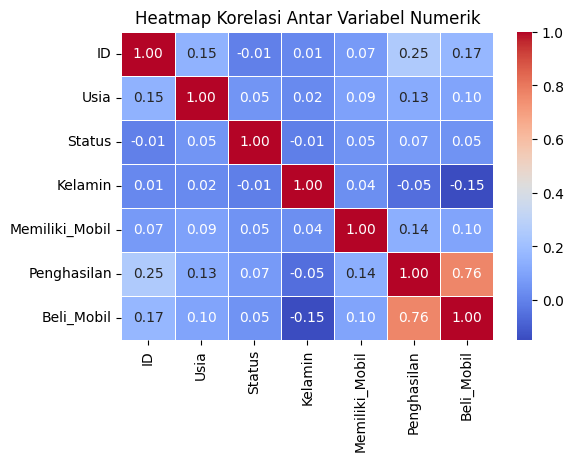

In [79]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

Pembagian Dataset (Training dan Testing)

Menentukan Fitur dan Target

In [90]:
# Fitur numerik dan beli_mobil
feature_num = ['Penghasilan']
feature_bin = ['Beli_Mobil']

# gabungkan & drop missing
use_cols = feature_num + feature_bin
df_model = df[use_cols].dropna().copy()

X = df_model[feature_num]
y = df_model['Beli_Mobil']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 1)
y shape: (1000,)


Membagi dataset menjadi training dan test

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data Latih: ", X_train.shape)
print("Data Uji: ", X_test.shape)

Data Latih:  (800, 1)
Data Uji:  (200, 1)


Pembangunan Model Logistic Regression

In [92]:
# Scale fitur numerik
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

# Latih model
clf.fit(X_train, y_train)
print("Model berhasil dilatih.")

Model berhasil dilatih.


Prediksi Model dan Evaluasi Model

In [93]:
# === Prediksi & Probabilitas ===
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# === Evaluasi Numerik ===
print("=== 📊 Hasil Evaluasi Model Logistic Regression ===")
print(f"Akurasi     : {accuracy_score(y_test, y_pred):.4f}")
print(f"Presisi     : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall      : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-Score    : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC-AUC     : {roc_auc_score(y_test, y_prob):.4f}")
print()

=== 📊 Hasil Evaluasi Model Logistic Regression ===
Akurasi     : 0.9150
Presisi     : 0.9741
Recall      : 0.8898
F1-Score    : 0.9300
ROC-AUC     : 0.9784



Visualisasi Hasil Evaluasi

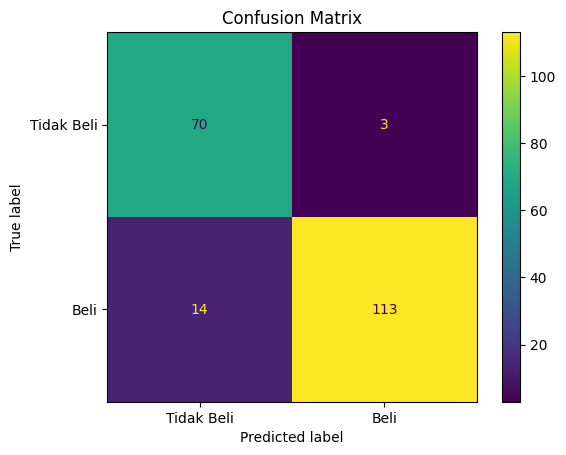

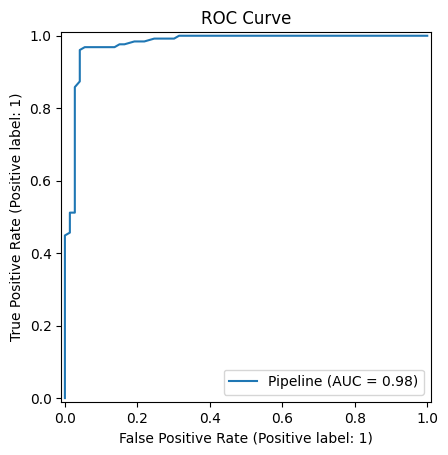

In [94]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=['Tidak Beli', 'Beli']
                       ).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title('ROC Curve')
plt.show()

Classification Report

In [95]:
print(classification_report(
    y_test, 
    y_pred, 
    target_names=['Tidak Beli (0)', 'Beli (1)'],
    digits=4
    ))

                precision    recall  f1-score   support

Tidak Beli (0)     0.8333    0.9589    0.8917        73
      Beli (1)     0.9741    0.8898    0.9300       127

      accuracy                         0.9150       200
     macro avg     0.9037    0.9243    0.9109       200
  weighted avg     0.9227    0.9150    0.9161       200



Classification Report

In [96]:
# Lakukan croos validation jika diperlukan
scores = cross_val_score(clf, X, y, cv=5)

# Tampilkan Hasil
print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standard Deviasi:", np.std(scores))

Skor tiap fold: [0.8   0.93  0.965 0.97  0.96 ]
Rata-rata akurasi: 0.925
Standard Deviasi: 0.06403124237432846


 Interpretasi Model Logistic Regression

In [97]:
# Ambil nama fitur & koefisien
feat_names = feature_num
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur' : feat_names,
    'Koefisien' : coefs,
    'Odds Ratio' : odds
}).sort_values('Odds Ratio', ascending=False)

display(coef_df)

,Fitur,Koefisien,Odds Ratio
0,Penghasilan,4.409568,82.233937


Prediksi Data Baru (Contoh Kasus)

In [99]:
# ✅ Contoh 4 pembeli mobil dengan variasi penghasilan
data_baru = pd.DataFrame({
    'Penghasilan': [2_000_000, 4_000_000, 6_000_000, 8_000_000]
})

# 🔹 Prediksi probabilitas dan kelas
proba = clf.predict_proba(data_baru)
prob_beli = proba[:, 1]   # Probabilitas beli mobil

# 🔹 Buat DataFrame hasil prediksi
hasil = data_baru.copy()
hasil['Penghasilan'] = hasil['Penghasilan'].apply(lambda x: f"Rp {x:,.0f}")
hasil['Prob_Tidak_Beli'] = proba[:, 0]
hasil['Prob_Beli'] = prob_beli

# 🔹 Gunakan threshold 0.6 (bukan default 0.5)
hasil['Prediksi_Beli_Mobil'] = (prob_beli >= 0.6).astype(int)
hasil['Keterangan'] = hasil['Prediksi_Beli_Mobil'].map({1: 'Beli', 0: 'Tidak Beli'})

# 🔹 Tampilkan hasil
print("Probabilitas Beli Mobil:", prob_beli)
print(df['Beli_Mobil'].value_counts(normalize=True))
display(hasil)

Probabilitas Beli Mobil: [1. 1. 1. 1.]
Beli_Mobil
1    0.633
0    0.367
Name: proportion, dtype: float64


,Penghasilan,Prob_Tidak_Beli,Prob_Beli,Prediksi_Beli_Mobil,Keterangan
0,"Rp 2,000,000",0.0,1.0,1,Beli
1,"Rp 4,000,000",0.0,1.0,1,Beli
2,"Rp 6,000,000",0.0,1.0,1,Beli
3,"Rp 8,000,000",0.0,1.0,1,Beli
